In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from range_charts import t_chart
from save_plot import insert_plot as IP
import ReferenceDictionary as dd

In [2]:
maindata = pd.read_csv("lipo_result_file_1.csv")
maindata.drop(["Directory","name","date","type"],axis = 1, inplace=True)

### Check Data

In [3]:
maindata

,Sample Name,TPTG [mg/dL],TPCH [mg/dL],LDCH [mg/dL],HDCH [mg/dL],TPA1 [mg/dL],TPA2 [mg/dL],TPAB [mg/dL],LDHD [-/-],ABA1 [-/-],...,H3PL [mg/dL],H4PL [mg/dL],H1A1 [mg/dL],H2A1 [mg/dL],H3A1 [mg/dL],H4A1 [mg/dL],H1A2 [mg/dL],H2A2 [mg/dL],H3A2 [mg/dL],H4A2 [mg/dL]
0,ATB_Plasma_Lipofit_03032023,79.08,241.99,161.65,67.62,163.90,39.93,97.06,2.39,0.59,...,16.47,36.29,15.67,17.38,27.55,103.43,1.48,3.23,6.95,28.66
1,MS_Plasma_Lipofit_03032023,277.08,214.51,109.77,53.12,151.51,37.45,103.81,2.07,0.69,...,14.31,35.86,9.11,15.08,21.59,101.89,0.98,2.45,6.29,30.10


In [4]:
maindata.isna().sum()

Sample Name     0
TPTG [mg/dL]    0
TPCH [mg/dL]    0
LDCH [mg/dL]    0
HDCH [mg/dL]    0
               ..
H4A1 [mg/dL]    0
H1A2 [mg/dL]    0
H2A2 [mg/dL]    0
H3A2 [mg/dL]    0
H4A2 [mg/dL]    0
Length: 113, dtype: int64

In [5]:
maindata.shape

(2, 113)

In [6]:
df = maindata.iloc[0]

In [7]:
df

Sample Name     ATB_Plasma_Lipofit_03032023
TPTG [mg/dL]                          79.08
TPCH [mg/dL]                         241.99
LDCH [mg/dL]                         161.65
HDCH [mg/dL]                          67.62
                           ...             
H4A1 [mg/dL]                         103.43
H1A2 [mg/dL]                           1.48
H2A2 [mg/dL]                           3.23
H3A2 [mg/dL]                           6.95
H4A2 [mg/dL]                          28.66
Name: 0, Length: 113, dtype: object

In [8]:
df.shape

(113,)

In [9]:
tests = pd.Series(df.index)

In [10]:
tests

0       Sample Name
1      TPTG [mg/dL]
2      TPCH [mg/dL]
3      LDCH [mg/dL]
4      HDCH [mg/dL]
           ...     
108    H4A1 [mg/dL]
109    H1A2 [mg/dL]
110    H2A2 [mg/dL]
111    H3A2 [mg/dL]
112    H4A2 [mg/dL]
Length: 113, dtype: object

### Regular Expressions

#### Subfractions

In [11]:
re_HDL_subf = r"H\d+"
re_LDL_subf = r"L\d+"
re_VLDL_subf =r"V\d+"

In [12]:
HDL_subf = tests[tests.str.contains(re_HDL_subf)]
LDL_subf = tests[tests.str.contains(re_LDL_subf)]
VLDL_subf = tests[tests.str.contains(re_VLDL_subf)]

In [13]:
re_HDL = r"^HD+"
re_IDL = r"^ID+"
re_LDL = r"^LD+"
re_VLDL =r"^VL+"

In [14]:
m_HDL = tests[tests.str.contains(re_HDL)]
m_IDL = tests[tests.str.contains(re_IDL)]
m_LDL = tests[tests.str.contains(re_LDL)]
m_VLDL = tests[tests.str.contains(re_VLDL)]

In [15]:
chol = r"[A-Za-z]\dCH"
freechol = r"[A-Za-z]\dFC"
phos = r"[A-Za-z]\dPL"
pnum = r"[A-Za-z]\dPN"
trig = r"[A-Za-z]\dTG"

#### HDL

In [16]:
apo = r"H1A\d"
HDL_APO = HDL_subf[HDL_subf.str.contains(apo)]

In [17]:
HDL_chol_subf = HDL_subf[HDL_subf.str.contains(chol)]
HDL_fchol_subf = HDL_subf[HDL_subf.str.contains(freechol)]
HDL_phos_subf = HDL_subf[HDL_subf.str.contains(phos)]
HDL_trig_subf = HDL_subf[HDL_subf.str.contains(trig)]

##### LDL

In [18]:
apo = r"L\dAB"
LDL_APO = LDL_subf[LDL_subf.str.contains(apo)]
LDL_APO

83    L1AB [mg/dL]
84    L2AB [mg/dL]
85    L3AB [mg/dL]
86    L4AB [mg/dL]
87    L5AB [mg/dL]
88    L6AB [mg/dL]
dtype: object

In [19]:
LDL_chol_subf = LDL_subf[LDL_subf.str.contains(chol)]
LDL_fchol_subf = LDL_subf[LDL_subf.str.contains(freechol)]
LDL_phos_subf = LDL_subf[LDL_subf.str.contains(phos)]
LDL_pnum_subf = LDL_subf[LDL_subf.str.contains(pnum)]
LDL_trig_subf = LDL_subf[LDL_subf.str.contains(trig)]

#### VLDL

In [20]:
VLDL_chol_subf = VLDL_subf[VLDL_subf.str.contains(chol)]
VLDL_fchol_subf = VLDL_subf[VLDL_subf.str.contains(freechol)]
VLDL_phos_subf = VLDL_subf[VLDL_subf.str.contains(phos)]
VLDL_trig_subf = VLDL_subf[VLDL_subf.str.contains(trig)]

#### Lipoproteins

In [21]:
re_HDLP = r"HD+"
re_LDLP = r"LD+"
re_IDLP = r"ID+"
re_VLDLP =r"VL+"

In [22]:
HDLP = tests[tests.str.contains(re_HDLP)]
LDLP = tests[tests.str.contains(re_LDLP)]
IDLP = tests[tests.str.contains(re_IDLP)]
VLDLP = tests[tests.str.contains(re_VLDLP)]

#### Lipoprotein Main Fractions

In [23]:
re_mainfrac = r"TP+"
LPMainF = tests[tests.str.contains(re_mainfrac)] 
LPMainF_list = LPMainF.tolist()
LPMainF_list.append("ABA1 [-/-]")
LPMainF_list.append("TBPN [nmol/L]")
LPMainF = pd.Series(LPMainF_list)

### LDL Subfractions

LDL_APO\
LDL_chol_subf\
LDL_fchol_subf\
LDL_phos_subf\
LDL_pnum_subf\
LDL_trig_subf\
\
for low density lipoprotein fractions.
Data is df 

##### Particle Number

In [24]:
ldf = df[LDL_pnum_subf].astype(float)
plt.plot(ldf.index.str.replace("[nmol/L]",""), ldf.values, marker='o', linestyle='-')
"""plt.bar(ldf.index.str.replace("[nmol/L]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest
        ,alpha= 0.3)"""

plt.title('LDL Particle Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('nmol/L', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("ldlsubparticlenum.png",plt, "LDL_SUBF")

##### Cholestrol

In [25]:
ldf = df[LDL_chol_subf].astype(float)
ldf_range = pd.DataFrame({"lowest": [8,2,3,4,5,6],"highest": [59,48,46,49,49,54]},
                         index = ldf.index)

merge_df = ldf_range.join(ldf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [26]:
plt.plot(ldf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(ldf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest,alpha= 0.3)

plt.title('LDL Cholestrol Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("chol.png",plt,"LDL_SUBF")

##### Free Cholestrol

In [27]:
ldf = df[LDL_fchol_subf].astype(float)
ldf_range = pd.DataFrame({"lowest": [2,1,1,1,2,2],"highest": [17,14,13,12,13,12]},
                         index = ldf.index)

merge_df = ldf_range.join(ldf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [28]:
plt.plot(ldf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(ldf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest,alpha= 0.3)

plt.title('LDL Free Cholestrol Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("freechol.png",plt,"LDL_SUBF")

##### Phospholipid

In [29]:
ldf = df[LDL_phos_subf].astype(float)
ldf_range = pd.DataFrame({"lowest": [6,2,2,3,4,4],"highest": [30,25,24,25,25,28]},
                         index = ldf.index)

merge_df = ldf_range.join(ldf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [30]:
plt.plot(ldf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(ldf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest,alpha= 0.3)

plt.title('LDL Phospholipid Subfractions', fontsize = 12)
plt.xlabel('Fractions', fontsize = 12)
plt.ylabel('mg/dL', fontsize = 12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("phospholipid.png",plt,"LDL_SUBF")

##### Triglycerides

In [31]:
ldf = df[LDL_trig_subf].astype(float)
ldf_range = pd.DataFrame({"lowest": [3,1,1,1,1,1],"highest": [14,6,6,8,9,13]},
                         index = ldf.index)

merge_df = ldf_range.join(ldf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [32]:
plt.plot(ldf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(ldf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('LDL Triglyceride Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("triglycerides.png",plt,"LDL_SUBF")

### HDL Subfractions

HDL_APO\
HDL_chol_subf\
HDL_fchol_subf\
HDL_phos_subf\
HDL_trig_subf\
\
for high density lipoprotein fractions.
Data is df 

##### Cholestrol

In [33]:
hdf = df[HDL_chol_subf].astype(float)
hdf_range = pd.DataFrame({"lowest": [6,4,7,11],"highest": [46,16,19,30]},
                         index = hdf.index)

merge_df = hdf_range.join(hdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [34]:
hdf = df[HDL_chol_subf]

plt.plot(hdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(hdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('HDL Cholestrol Subfractions', fontsize = 12)
plt.xlabel('Fractions', fontsize = 12)
plt.ylabel('mg/dL', fontsize = 12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("chol.png",plt,"HDL_SUBF")

##### Free Cholestrol

In [35]:
hdf = df[HDL_fchol_subf].astype(float)
hdf_range = pd.DataFrame({"lowest": [1,1,1,2],"highest": [12,5,5,9]},
                         index = hdf.index)

merge_df = hdf_range.join(hdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [36]:
plt.plot(hdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(hdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('HDL Free Cholestrol Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("freechol.png",plt,"HDL_SUBF")

##### Phospholipid

In [37]:
hdf = df[HDL_phos_subf].astype(float)
hdf_range = pd.DataFrame({"lowest": [8,7,12,20],"highest": [57,27,32,44]},
                         index = hdf.index)

merge_df = hdf_range.join(hdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [38]:
plt.plot(hdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(hdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('HDL Phospholipid Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("phospholipid.png",plt,"HDL_SUBF")

##### Triglycerides

In [39]:
hdf = df[HDL_trig_subf].astype(float)
hdf_range = pd.DataFrame({"lowest": [1,1,1,2],"highest": [12,5,5,8]},
                         index = hdf.index)

merge_df = hdf_range.join(hdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [40]:
plt.plot(hdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(hdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('HDL Triglyceride Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("triglycerides.png",plt,"HDL_SUBF")

### VLDL Subfractions

VLDL_chol_subf\
VLDL_fchol_subf\
VLDL_phos_subf\
VLDL_trig_subf\
\
for very low density lipoprotein fractions.
Data is df 

##### Cholestrol

In [41]:
vdf = df[VLDL_chol_subf].astype(float)
vdf_range = pd.DataFrame({"lowest": [1,0,0,1,0],"highest": [35,15,16,15,4]},
                         index = vdf.index)

merge_df = vdf_range.join(vdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [42]:
plt.plot(vdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(vdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('VLDL Cholestrol Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("chol.png",plt,"VLDL_SUBF")

##### Free Cholestrol

In [43]:
vdf = df[VLDL_fchol_subf].astype(float)
vdf_range = pd.DataFrame({"lowest": [0,0,0,0,0],"highest": [13,7,8,7,2]},
                         index = vdf.index)

merge_df = vdf_range.join(vdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [44]:
plt.plot(vdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(vdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('VLDL Free Cholestrol Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("freechol.png",plt,"VLDL_SUBF")

##### Phospholipid

In [45]:
vdf = df[VLDL_phos_subf].astype(float)
vdf_range = pd.DataFrame({"lowest": [1,1,1,2,0],"highest": [32,15,14,13,5]},
                         index = vdf.index)

merge_df = vdf_range.join(vdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [46]:
plt.plot(vdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(vdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('VLDL Phospholipid Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("phospholipid.png",plt,"VLDL_SUBF")

##### Triglycerides

In [47]:
vdf = df[VLDL_trig_subf].astype(float)
vdf_range = pd.DataFrame({"lowest": [6,3,2,3,1],"highest": [212,67,49,28,7]},
                         index = vdf.index)

merge_df = vdf_range.join(vdf).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [48]:
plt.plot(vdf.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(vdf.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title('VLDL Triglyceride Subfractions', fontsize=12)
plt.xlabel('Fractions', fontsize=12)
plt.ylabel('mg/dL', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.grid(True)
IP("triglycerides.png",plt,"VLDL_SUBF")

### Chart Tests

In [49]:
dfdict= df.to_dict()

lp_df = df[LPMainF]
hdl_df = df[m_HDL]
idl_df = df[m_IDL]
ldl_df = df[m_LDL]
vldl_df = df[m_VLDL]

Tests to be charted:

nc_tests_dict = lp_df.to_dict() | hdl_df.to_dict() | idl_df.to_dict() | ldl_df.to_dict() | vldl_df.to_dict()

In [50]:
def create_colored_box_image(usename, value, sick, unit = None):
    if sick == True:
        box_color = 'orangered'
    elif sick == False:
        box_color = 'lawngreen'
    elif sick == "noref":
        box_color = 'white'
    else:
        box_color = 'orange'

    usename = usename + "_box"

    fig, ax = plt.subplots(figsize=(2.85, 0.65))

    text = str(value)
    try:
        unit = unit.replace("[","").replace("]","")
    except:
        ax.text(0.5, 0.5, text, color='black', fontsize=20, va='center', ha='center')
    else:
        ax.text(0.5, 0.5, text+" "+unit, color='black', fontsize=20, va='center', ha='center')
    
    rect = plt.Rectangle((0, 0), 2.75, 1, color=box_color)
    ax.add_patch(rect)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    IP(usename,plt)

In [51]:
output = open("problem_output.txt","w")

for test , pval in dfdict.items():
    #get name and unit of the test seperately
    usename = test.replace(" [mg/dL]", "").replace(" [nmol/L]", "").replace(" [-/-]", "")
    if "[mg/dL]" in test:
        unit =  "[mg/dL]"
    elif "[nmol/L]" in test:
        unit = "[nmol/L]"
    else:
        unit = None

    #check the test's existence
    try:
        attribute = getattr(dd.TESTS(),usename)
    except:
        output.write(f"{test} is not in tests dictionary.\n")
    else:
        try:
                attribute["Optimal"]
        except:
            try:
                attribute["OptimalnCD"] #Do these exist?
                attribute["OptimalCD"]
            except:
                print("Problem")
                pass
            else: # more than two reference values
                while True:
                    past = input("History of any Cardiovascular Events? y/n ")
                    if past == "n":
                        optval = float(attribute["OptimalnCD"][2:].strip())
                        riskval = float(attribute["Risk"][2:].strip())
                        constant = 2 * (abs(optval - riskval)) / 3
                        
                        fig = t_chart(df[test], optval, riskval, attribute["OptimalnCD"] ,attribute["Risk"], constant)
                        plot_file = f'{usename}.png'
                        IP(plot_file, fig)
                        
                        create_colored_box_image(usename, df[test], "noref", unit)
                        break
                    elif past == "y":
                        optval = float(attribute["OptimalCD"][2:].strip())
                        riskval = float(attribute["Risk"][2:].strip())
                        constant = 2 * (abs(optval - riskval)) / 3

                        fig = t_chart(df[test], optval, riskval, attribute["OptimalCD"] ,attribute["Risk"], constant)
                        plot_file = f'{usename}.png'
                        IP(plot_file, fig)

                        create_colored_box_image(usename, df[test], "noref", unit)
                        break
                    else:
                        print("Wrong input.")
        else:
            if attribute["Optimal"] is None and attribute["Risk"] is None: #check for no reference
                create_colored_box_image(usename, pval, "noref", unit)
            elif attribute["Optimal"][2:].strip() == attribute["Risk"][2:].strip(): #check for one reference value
                condition = f"{pval} {attribute}"
                if pval == attribute["Optimal"][2:].strip():
                    create_colored_box_image(usename, pval, "not boolean", unit)
                elif eval(f"{pval} {attribute['Optimal']}"): # pval > or < Optimal w
                    create_colored_box_image(usename, pval, False, unit)
                else:
                    create_colored_box_image(usename, pval, True, unit)
                    
            else: #two reference value
                optval = float(attribute["Optimal"][2:].strip())
                riskval = float(attribute["Risk"][2:].strip())
                constant = 2 * (abs(optval - riskval)) / 3

                fig = t_chart(df[test], optval, riskval, attribute["Optimal"] ,attribute["Risk"], constant) # or "Optimal" , "Risk" as line names
                plot_file = f'{usename}.png'
                IP(plot_file, fig)

                create_colored_box_image(usename, df[test], "noref", unit)
output.close()

#### cLFLC & cHFHC

##### LFLC

In [52]:
db = dd.TESTS.LFLC
cLFLC = round(df["LDFC [mg/dL]"]/df["LDCH [mg/dL]"],2)

In [53]:
optval = float(db["Optimal"][2:].strip())
riskval = float(db["Risk"][2:].strip())
constant = 2 * (abs(optval - riskval)) / 3

fig = t_chart(cLFLC, optval, riskval, attribute["Optimal"] ,attribute["Risk"], constant)
plot_file = 'LFLC.png'
IP(plot_file, fig)

create_colored_box_image(plot_file.replace(".png",""), cLFLC, "noref", unit)

##### HFHC

In [54]:
db = dd.TESTS.HFHC
cHFHC = round(df["HDFC [mg/dL]"]/df["HDCH [mg/dL]"],2)

In [55]:
if eval(f"{cHFHC} {db['Optimal']}"):
    create_colored_box_image("HFHC", cHFHC, False, unit)
else:
    create_colored_box_image("HFHC", cHFHC, True, unit)


#### Subfraction Group Charts

Triglycerides

In [56]:
lipoprot_tg = ["HDTG [mg/dL]","IDTG [mg/dL]","LDTG [mg/dL]","VLTG [mg/dL]"]
lps = df[lipoprot_tg].astype(float)

lps_range = pd.DataFrame({"lowest": [7,5,12,21],"highest": [29,100,45,336]},
                         index = lps.index)

merge_df = lps_range.join(lps).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [57]:
plt.plot(lps.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(lps.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title("Lipoprotein Triglycerides")
plt.xlabel('Proteins')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
IP("TG_lipoproteins",plt)

Cholestrol

In [58]:
lipoprot_ch = ["HDCH [mg/dL]","IDCH [mg/dL]","LDCH [mg/dL]","VLCH [mg/dL]"]
lps = df[lipoprot_ch].astype(float)

lps_range = pd.DataFrame({"lowest": [35,4,55,5],"highest": [96,50,227,77]},
                         index = lps.index)

merge_df = lps_range.join(lps).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [59]:
plt.plot(lps.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(lps.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title("Lipoprotein Cholestrol")
plt.xlabel('Proteins')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
IP("CH_lipoproteins",plt)

Free Cholestrol

In [60]:
lipoprot_fc = ["HDFC [mg/dL]","IDFC [mg/dL]","LDFC [mg/dL]","VLFC [mg/dL]"]
lps = df[lipoprot_fc].astype(float)

lps_range = pd.DataFrame({"lowest": [7,1,17,3],"highest": [27,14,63,33]},
                         index = lps.index)

merge_df = lps_range.join(lps).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [61]:
plt.plot(lps.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(lps.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title("Lipoprotein Free Cholestrol")
plt.xlabel('Proteins')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
IP("FC_lipoproteins",plt)

Phospholipid

In [62]:
lipoprot_pl = ["HDPL [mg/dL]","IDPL [mg/dL]","LDPL [mg/dL]","VLPL [mg/dL]"]
lps = df[lipoprot_pl].astype(float)

lps_range = pd.DataFrame({"lowest": [57,3,37,6],"highest": [136,33,121,68]},
                         index = lps.index)

merge_df = lps_range.join(lps).rename(columns={0:"patient"})

merge_df.patient = merge_df.patient.astype(float)
merge_df.lowest = merge_df.lowest.astype(float)
merge_df.highest = merge_df.highest.astype(float)

In [63]:
plt.plot(lps.index.str.replace("[mg/dL]",""), merge_df.patient, marker='o', linestyle='-')
plt.bar(lps.index.str.replace("[mg/dL]",""), merge_df.highest-merge_df.lowest, color='blue', bottom=merge_df.lowest, alpha= 0.3)

plt.title("Lipoprotein Phospholipids")
plt.xlabel('Proteins')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
IP("PL_lipoproteins",plt)

# Time

In [65]:
df["LDPN [nmol/L]"]

1623.31

In [66]:
df["LDCH [mg/dL]"]

161.65

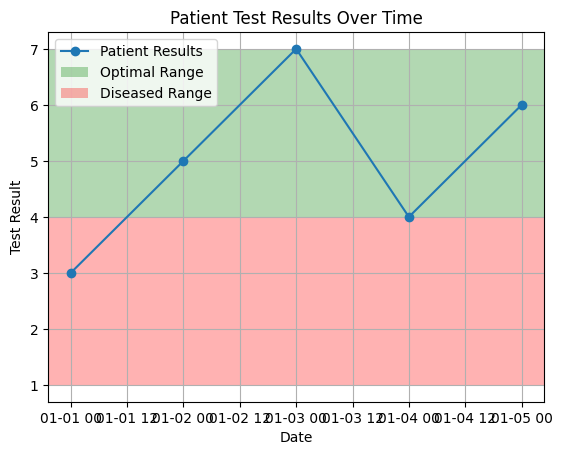

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data
dates = pd.date_range('2023-01-01', periods=5)
patient_results = [3, 5, 7, 4, 6]
optimal_range = [4, 7]  # Example optimal range
diseased_range = [1, 3]  # Example diseased range

# Plot patient results
plt.plot(dates, patient_results, marker='o', label='Patient Results')

# Shade optimal range
plt.axhspan(optimal_range[0], optimal_range[1], facecolor='green', alpha=0.3, label='Optimal Range')

# Shade diseased range
plt.axhspan(diseased_range[0], optimal_range[0], facecolor='red', alpha=0.3, label='Diseased Range')

# Customize plot labels and appearance
plt.title('Patient Test Results Over Time')
plt.xlabel('Date')
plt.ylabel('Test Result')
plt.legend()
plt.grid(True)
plt.show()


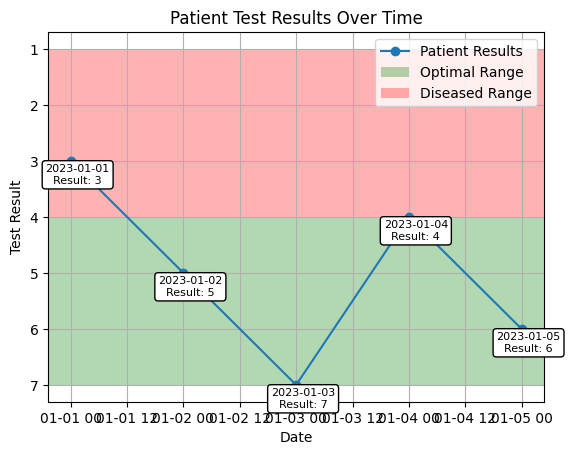

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data
dates = pd.date_range('2023-01-01', periods=5)
patient_results = [3, 5, 7, 4, 6]
optimal_range = [4, 7]  # Example optimal range
diseased_range = [1, 3]  # Example diseased range

# Plot patient results
plt.plot(dates, patient_results, marker='o', label='Patient Results')

# Shade optimal range
plt.axhspan(optimal_range[0], optimal_range[1], facecolor='green', alpha=0.3, label='Optimal Range')

# Shade diseased range
plt.axhspan(diseased_range[0], optimal_range[0], facecolor='red', alpha=0.3, label='Diseased Range')

# Annotate each data point
for date, result in zip(dates, patient_results):
    plt.annotate(f'{date.strftime("%Y-%m-%d")}\nResult: {result}',
                 xy=(date, result),
                 xytext=(5, -10),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 fontsize=8,
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Customize plot labels and appearance
plt.title('Patient Test Results Over Time')
plt.xlabel('Date')
plt.ylabel('Test Result')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


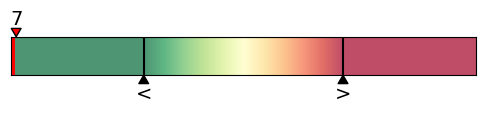

In [69]:
import matplotlib.pyplot as plt
import numpy as np

constant = 2 * (abs(27 - 20)) / 3

x_min = 20 - constant
x_max = 27 + constant

x = np.linspace(x_min, x_max, 1000)
y = np.ones(1000)

range_values = np.where(x <= 20, 0, np.where(x > 27, 1, (x - 20) / (27 - 20)))
range_values = range_values.reshape(1, -1)

fig, ax = plt.subplots(figsize=(6, 0.5))

ax.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
ax.plot(x, y, color='black')

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

for limit, label in zip([20, 27], ["<", ">"]):
    ax.axvline(x=limit, color='black', linestyle='-', linewidth=1.5)
    ax.annotate(str(label), xy=(limit, 0), xytext=(limit, -0.50), ha='center', va='center', fontsize=14,
                arrowprops=dict(facecolor='black', headwidth=7, headlength=6))

# Patient
patient = 7
custom_value = max(x_min, min(patient, x_max))
linewidth = 2 if x_min < patient < x_max else 5
ax.axvline(x=custom_value, color='red', linestyle='-', linewidth=linewidth)

if patient < x_max and patient > x_min:
    ax.annotate(str(patient), xy=(patient, 1), xytext=(patient, 1.45), ha='center', va='center', fontsize=14,
                arrowprops=dict(facecolor='red', headwidth=7, headlength=6))
elif patient <= x_min:
    ax.annotate(str(patient), xy=(x_min + constant/25, 1), fontsize=14,
                xytext=(x_min + constant/25, 1.45), ha='center', va='center',
                arrowprops=dict(facecolor='red', headwidth=7, headlength=6))
else:
    ax.annotate(str(patient), xy=(x_max - constant/25, 1), fontsize=14,
                xytext=(x_max - constant/25, 1.45), ha='center', va='center',
                arrowprops=dict(facecolor='red', headwidth=7, headlength=6))

plt.show()


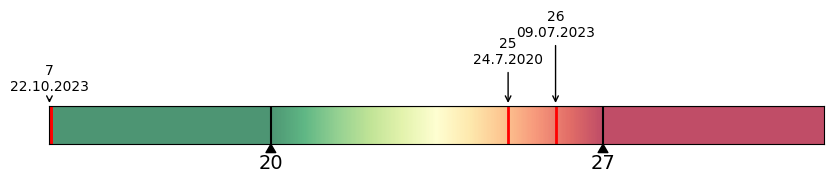

In [125]:
import matplotlib.pyplot as plt
import numpy as np

constant = 2 * (abs(27 - 20)) / 3

x_min = 20 - constant
x_max = 27 + constant

x = np.linspace(x_min, x_max, 1000)
y = np.ones(1000)

range_values = np.where(x <= 20, 0, np.where(x > 27, 1, (x - 20) / (27 - 20)))
range_values = range_values.reshape(1, -1)

fig, ax = plt.subplots(figsize=(10, 0.5))

ax.imshow(range_values, cmap='RdYlGn_r', aspect='auto', extent=[x_min, x_max, 0, 1], alpha=0.7)
ax.plot(x, y, color='black')

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

for limit in [20, 27]:
    ax.axvline(x=limit, color='black', linestyle='-', linewidth=1.5)
    ax.annotate(str(limit), xy=(limit, 0), xytext=(limit, -0.50), ha='center', va='center', fontsize=14,
                arrowprops=dict(facecolor='black', headwidth=7, headlength=6))

# Patient results at different dates
dates = ["22.10.2023", "24.7.2020", "09.07.2023"]
results = [7, 25, 26]

count = 0
for date, result in zip(dates, results):
    custom_value = max(x_min, min(result, x_max))
    linewidth = 2 if x_min < result < x_max else 5
    ax.axvline(x=custom_value, color='red', linestyle='-', linewidth=linewidth)
    
    ax.annotate(str(result)+"\n"+ date , xy=(custom_value, 1), xytext=(custom_value, 1.7+ count), 
                ha='center', va='center', fontsize=10,
                arrowprops=dict(facecolor='red', arrowstyle = "->"))
    count += 0.7

plt.show()
